In [141]:
import numpy as np 
import pandas as pd 
import re 
# import nltk 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

<h1>Reading The CVS File</h1>

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Flipkart_data=pd.read_csv("flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample.csv")
Flipkart_data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >>

<h1>Observing the basic stuff about flipkart datasets like is there any nun-value, their counts and their data types </h1>

In [143]:
Flipkart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [144]:
print(Flipkart_data.shape)
print(Flipkart_data.isnull().sum())

(20000, 15)
uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64


<h1> Using Heatmap in seaborn checking how much null values present in each column </h1>

<AxesSubplot:>

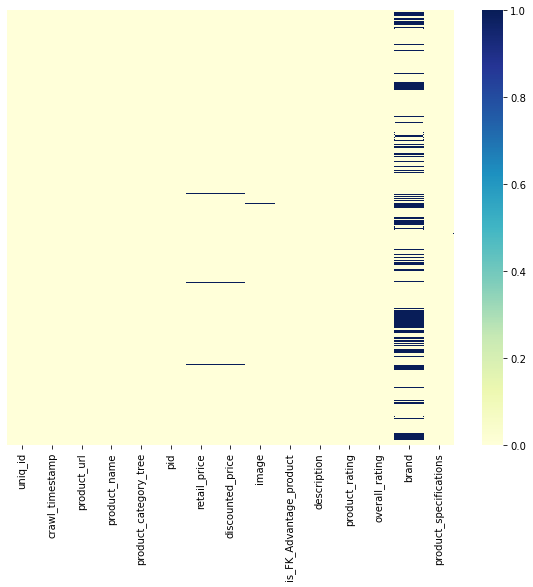

In [145]:
plt.figure(figsize =(10,8))
sns.heatmap(Flipkart_data.isnull(),yticklabels=False,cmap='YlGnBu',cbar=True)

# Checking the duplicated values 

In [146]:
Flipkart_data.duplicated().value_counts()

False    20000
dtype: int64

# Converting date time stamp to different columns 

In [147]:

Flipkart_data['crawl_timestamp']=pd.to_datetime(Flipkart_data['crawl_timestamp'])
Flipkart_data['crawl_timestamp']

0       2016-03-25 22:59:23+00:00
1       2016-03-25 22:59:23+00:00
2       2016-03-25 22:59:23+00:00
3       2016-03-25 22:59:23+00:00
4       2016-03-25 22:59:23+00:00
                   ...           
19995   2015-12-01 10:15:43+00:00
19996   2015-12-01 10:15:43+00:00
19997   2015-12-01 10:15:43+00:00
19998   2015-12-01 10:15:43+00:00
19999   2015-12-01 10:15:43+00:00
Name: crawl_timestamp, Length: 20000, dtype: datetime64[ns, UTC]

In [148]:
Flipkart_data['crawl_year']=Flipkart_data['crawl_timestamp'].apply(lambda x : x.year)

In [149]:
Flipkart_data['crawl_year']

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
19995    2015
19996    2015
19997    2015
19998    2015
19999    2015
Name: crawl_year, Length: 20000, dtype: int64

In [150]:
Flipkart_data['Month']=Flipkart_data['crawl_timestamp'].apply(lambda x : x.month)
Flipkart_data['Month']

0         3
1         3
2         3
3         3
4         3
         ..
19995    12
19996    12
19997    12
19998    12
19999    12
Name: Month, Length: 20000, dtype: int64

# 

# Taking first four level of category tree and creating seperate column for all

In [151]:
def main_category(value):
    try:
        return value.split('>>')[0][2:len(value.split('>>')[0])-1]
    except IndexError:
        return 'None'  

def secondary_category(value):
    try:
        return value.split('>>')[1][1:len(value.split('>>')[1])-1]
    except IndexError:
        return 'None'       
    
def tertiary_category(value):
    try:
        return value.split('>>')[2][1:len(value.split('>>')[2])-1]
    except IndexError:
        return 'None'
    
def quaternary_category(value):
    try:
        return value.split('>>')[3][1:len(value.split('>>')[3])-1]
    except IndexError:
        return 'None'

In [152]:
Flipkart_data['main_category']=Flipkart_data['product_category_tree'].apply(main_category)
Flipkart_data['secondary']=Flipkart_data['product_category_tree'].apply(secondary_category)
Flipkart_data['tertiary']=Flipkart_data['product_category_tree'].apply(tertiary_category)
Flipkart_data['quaternary']=Flipkart_data['product_category_tree'].apply(quaternary_category)

# Anylizing each column created above (frequency of each category)

In [153]:
Flipkart_data['main_category']

0            Clothing
1           Furniture
2            Footwear
3            Clothing
4        Pet Supplies
             ...     
19995       Baby Care
19996       Baby Care
19997       Baby Care
19998       Baby Care
19999       Baby Care
Name: main_category, Length: 20000, dtype: object

In [154]:
Flipkart_data['main_category'].value_counts()[:10].sort_values(ascending=False)

Clothing                      6198
Jewellery                     3531
Footwear                      1227
Mobiles & Accessories         1099
Automotive                    1012
Home Decor & Festive Needs     929
Beauty and Personal Care       710
Home Furnishing                700
Kitchen & Dining               647
Computers                      578
Name: main_category, dtype: int64

<AxesSubplot:>

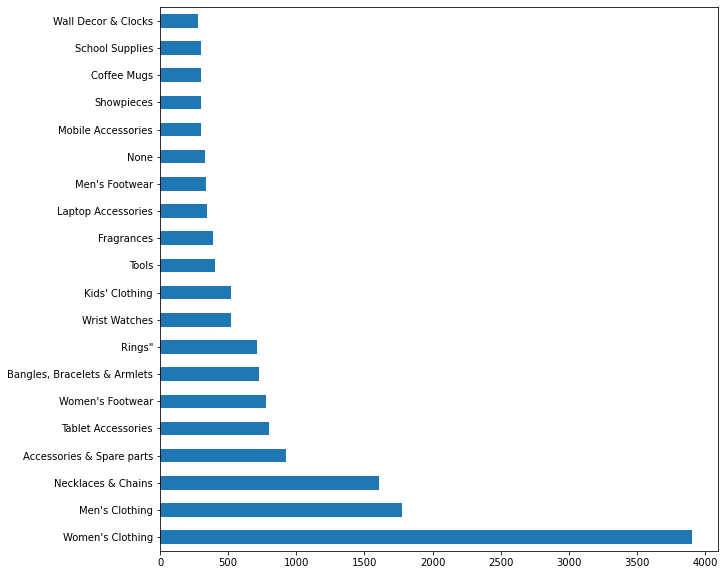

In [155]:
plt.figure(figsize=(10,10))
Flipkart_data['secondary'].value_counts()[:20].sort_values(ascending=False).plot(kind='barh')

In [156]:
Flipkart_data['tertiary'].value_counts()[:10].sort_values(ascending=False)

Western Wear                  1981
Necklaces"                    1567
None                          1457
Lingerie, Sleep & Swimwear    1208
T-Shirts                       903
Cases & Covers                 796
Car Interior & Exterior        677
Ethnic Wear                    485
Casual Shoes                   454
Bangles"                       430
Name: tertiary, dtype: int64

<AxesSubplot:>

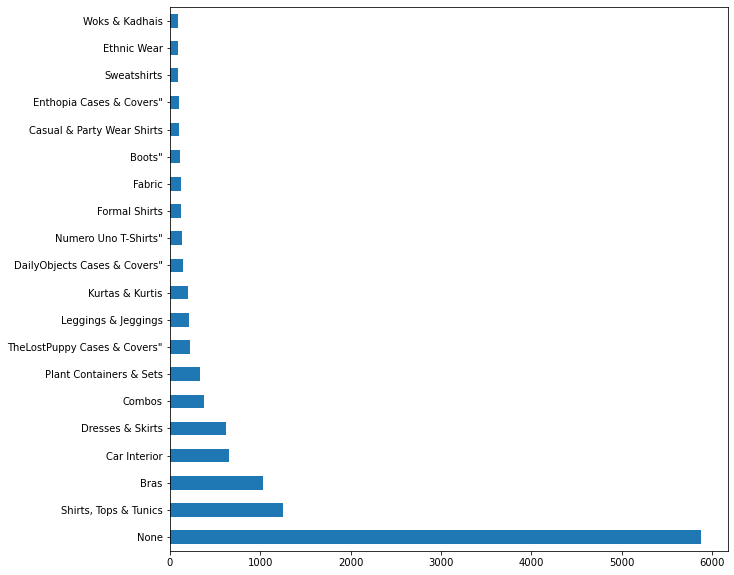

In [157]:
plt.figure(figsize=(10,10))
Flipkart_data['quaternary'].value_counts()[:20].plot(kind='barh')

In [158]:
Flipkart_data['quaternary'].value_counts()[:10].sort_values(ascending=False)

None                            5876
Shirts, Tops & Tunics           1249
Bras                            1036
Car Interior                     659
Dresses & Skirts                 620
Combos                           375
Plant Containers & Sets          333
TheLostPuppy Cases & Covers"     229
Leggings & Jeggings              209
Kurtas & Kurtis                  202
Name: quaternary, dtype: int64

# Function for cleaning the string like removing multiple spaces, changing to lower case, converting to all alphabets

In [159]:
def preprocess_string(str_arg):
    cleaned_str=re.sub('[^a-z\s]+',' ',str_arg,flags=re.IGNORECASE) 
    cleaned_str=re.sub('(\s+)',' ',cleaned_str) 
    cleaned_str=cleaned_str.lower() 
    return cleaned_str 

# Chossing only first six category for classification purpose

In [160]:
Flipkart_data['product_category_tree'] = Flipkart_data['product_category_tree'].apply(lambda x : x.split('>>')[0][2:].strip())
# Category processing
top_six_gen = list(Flipkart_data.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(6).index)
processed_df = Flipkart_data[Flipkart_data['product_category_tree'].isin(top_six_gen)][['product_category_tree','description']]
# Selecting only relevant columns
processed_df['description'] = processed_df['description'].astype('str').apply(preprocess_string)
# Cleaning strings
cat_list = list(processed_df['product_category_tree'].unique())
# Creating a list of categories for later use
print(cat_list)
# Printing the list of top 6 categories
le = preprocessing.LabelEncoder()
category_encoded=le.fit_transform(processed_df['product_category_tree'])
processed_df['product_category_tree'] = category_encoded
# Encoding the product category

['Clothing', 'Footwear', 'Home Decor & Festive Needs', 'Automotive', 'Mobiles & Accessories', 'Jewellery']


# Spliting the data using sklearn library train_test_split. Using description column as input and prodcut_category_tree as output 

In [161]:
X_train, X_test, y_train, y_test = train_test_split(processed_df['description'],processed_df['product_category_tree'],test_size=0.2)

# Converting each sentence into vectors using count vectorizer

In [162]:
vect = CountVectorizer(stop_words = 'english')
X_train_matrix = vect.fit_transform(X_train) 

# Using multinomian NB model for training and testing. Then calculating the score

In [163]:
clf=MultinomialNB()
# Defining model
clf.fit(X_train_matrix, y_train)
# Fitting to multinomial NB model 
print(clf.score(X_train_matrix, y_train))
# Scoring the trained model (Expected to be above 95 percent)
X_test_matrix = vect.transform(X_test) 
# Converting the test data
print (clf.score(X_test_matrix, y_test))
# Scoring for the test data
predicted_result=clf.predict(X_test_matrix)
print(classification_report(y_test,predicted_result))

0.9917827795641301
0.9914285714285714
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       206
           1       1.00      0.99      1.00      1216
           2       0.98      1.00      0.99       270
           3       0.97      0.99      0.98       174
           4       0.98      1.00      0.99       702
           5       1.00      0.95      0.97       232

    accuracy                           0.99      2800
   macro avg       0.99      0.99      0.99      2800
weighted avg       0.99      0.99      0.99      2800



# Repeating the process after applying TF-IDF 

In [164]:
vectorizer = TfidfVectorizer(stop_words = 'english')
X_train_tfidf = vectorizer.fit_transform(X_train)

In [165]:
clf2=MultinomialNB()
# Defining model
clf2.fit(X_train_tfidf, y_train)
# Fitting to multinomial NB model 
print(clf2.score(X_train_tfidf, y_train))
# Scoring the trained model
X_test_tfidf = vectorizer.transform(X_test) 
# Converting the test data
print (clf2.score(X_test_tfidf, y_test))

0.9909789210432297
0.9864285714285714
